In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelFile
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA_Data_2000.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


In [3]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
3,2000,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
4,2000,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0


In [4]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


In [5]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,SG,26.0,DEN,29.0,12.0,420.0,5.8,0.438,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,SG,27.0,TOT,24.0,12.0,441.0,9.8,0.418,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [6]:

#remove 'unnamed' and position columns

complete_df = merged_df.drop(["Pos"],axis=1)

#preview DataFrame: complete_df
complete_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,0.041,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,25.0,DEN,15.0,10.0,373.0,10.8,0.448,0.015,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,26.0,DEN,29.0,12.0,420.0,5.8,0.438,0.090,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,27.0,TOT,24.0,12.0,441.0,9.8,0.418,0.014,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


In [115]:

#Filter Years to desired years: we want form 2000 to 2017

my_filter = complete_df.Year >= 1990
desired_years_df = complete_df[my_filter]

#Sort values by 'Years' column

desired_years_df = desired_years_df.sort_values(by=['Year'])

#Reset Index

desired_years_df = desired_years_df.reset_index()

#Delete 'index' column

desired_years_df = desired_years_df.drop(['index'], axis=1)

#preview DataFrame: desired_years_df

desired_years_df.head()

,Year,name,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,0.036,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Chris Gatling,32.0,TOT,85.0,0.0,1811.0,17.3,0.525,0.087,...,71.0,82.0,23.0,169.0,246.0,1014.0,F-C,220,82,6ft 10in
2,2000,Chris Gatling,32.0,ORL,45.0,0.0,1041.0,17.4,0.525,0.050,...,40.0,48.0,10.0,105.0,142.0,598.0,F-C,220,82,6ft 10in
3,2000,Chris Gatling,32.0,DEN,40.0,0.0,770.0,17.1,0.525,0.138,...,31.0,34.0,13.0,64.0,104.0,416.0,F-C,220,82,6ft 10in
4,2000,Matt Geiger,30.0,PHI,65.0,20.0,1406.0,13.9,0.483,0.007,...,39.0,29.0,22.0,91.0,194.0,629.0,C,243,85,7ft 1in


In [8]:
two_thousand = desired_years_df.loc[desired_years_df["Year"]==2000]

In [9]:
center_1 = two_thousand.loc[two_thousand["position"]== "C"]
for_cent_1 = two_thousand.loc[two_thousand["position"]== "F-C"]
forward_1 = two_thousand.loc[two_thousand["position"]== "F"]

In [39]:
two_thousand_ten = desired_years_df.loc[desired_years_df["Year"]==2010]

In [40]:
center_2 = two_thousand_ten.loc[two_thousand_ten["position"]== "C"]
for_cent_2 = two_thousand_ten.loc[two_thousand_ten["position"]== "F-C"]
forward_2 = two_thousand_ten.loc[two_thousand_ten["position"]== "F"]

In [10]:
two_thousand_seventeen = desired_years_df.loc[desired_years_df["Year"]==2017]

In [42]:
center_3 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "C"]
for_cent_3 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F-C"]
forward_3 = two_thousand_seventeen.loc[two_thousand_seventeen["position"]== "F"]

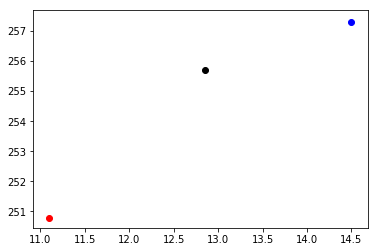

In [43]:
plt.scatter(center_1["PER"].mean(),center_1["weight"].mean(), color = "red")
plt.scatter(center_2["PER"].mean(),center_2["weight"].mean(), color = "black")
plt.scatter(center_3["PER"].mean(),center_3["weight"].mean(), color = "blue")

plt.show()


In [14]:
stats.ttest_ind(center_2.PER, center_1.PER, equal_var=False)

Ttest_indResult(statistic=2.532745256072087, pvalue=0.013225838140149666)

In [87]:
#Drop N/A values in 'Pos' column
#desired_years_df["Pos"] = complete_df.Pos.dropna()

#Groupby year

grouped_df = desired_years_df.groupby(['Year','position'])
avg_weight = grouped_df['weight'].mean()

#avg_weight_df = avg_weight_df.rename(columns={"Year":"Year",
                                             #"position":"Position",
                                             #"weight":"Weight"})

In [89]:
avg_weight.reset_index()

,Year,position,weight
0,2000,C,250.792453
1,2000,C-F,231.250000
2,2000,F,228.033113
3,2000,F-C,231.851852
4,2000,F-G,213.428571
5,2000,G,187.929936
6,2000,G-F,205.902439
7,2001,C,252.260870
8,2001,C-F,234.000000
9,2001,F,227.705521


In [97]:
type(avg_weight)

pandas.core.series.Series

In [100]:
avg_weight_df = avg_weight.to_frame()

In [101]:
avg_weight_df

weight
Year position            
2000 C         250.792453
     C-F       231.250000
     F         228.033113
     F-C       231.851852
     F-G       213.428571
     G         187.929936
     G-F       205.902439
2001 C         252.260870
     C-F       234.000000
     F         227.705521
     F-C       232.560000
     F-G       209.894737
     G         188.916201
     G-F       205.225806
2002 C         252.493151
     C-F       239.375000
     F         229.820896
     F-C       235.680851
     F-G       214.105263
     G         190.176136
     G-F       210.548387
2003 C         249.825397
     C-F       241.125000
     F         233.103704
     F-C       238.039216
     F-G       218.000000
     G         192.228070
     G-F       211.000000
2004 C         251.569767
     C-F       230.818182
...                   ...
2013 G         195.909091
     G-F       215.250000
2014 C         257.636364
     C-F       249.090909
     F         229.966102
     F-C       249.000000
     F-G       217.739130
     G         195.220264
     G-F       212.416667
2015 C         256.000000
     C-F       247.346154
     F         230.208092
     F-C       244.779661
     F-G       214.500000
     G         193.672000
     G-F       213.000000
2016 C         255.551020
     C-F       248.800000
     F         231.902098
     F-C       246.078125
     F-G       220.000000
     G         193.709821
     G-F       215.400000
2017 C         257.285714
     C-F       246.421053
     F         229.642384
     F-C       243.723404
     F-G       216.812500
     G         194.769585
     G-F       213.533333

[126 rows x 1 columns]

In [102]:
type(avg_weight_df)

pandas.core.frame.DataFrame

In [103]:
avg_weight_df = avg_weight_df.reset_index()

In [104]:
avg_weight_df

,Year,position,weight
0,2000,C,250.792453
1,2000,C-F,231.250000
2,2000,F,228.033113
3,2000,F-C,231.851852
4,2000,F-G,213.428571
5,2000,G,187.929936
6,2000,G-F,205.902439
7,2001,C,252.260870
8,2001,C-F,234.000000
9,2001,F,227.705521


In [105]:
test = avg_weight_df.loc[avg_weight_df["position"]=="C"]

In [106]:
test

,Year,position,weight
0,2000,C,250.792453
7,2001,C,252.260870
14,2002,C,252.493151
21,2003,C,249.825397
28,2004,C,251.569767
35,2005,C,253.229730
42,2006,C,258.442857
49,2007,C,258.086207
56,2008,C,253.577465
63,2009,C,253.480519


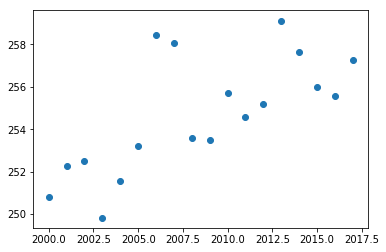

In [169]:
plt.scatter(test["Year"], test["weight"])

In [157]:
new_df = desired_years_df.groupby(['Year','position'])
avg_height = new_df["height (inches)"].mean()
avg_height.reset_index()

,Year,position,height (inches)
0,2000,C,84.226415
1,2000,C-F,82.625000
2,2000,F,80.304636
3,2000,F-C,81.833333
4,2000,F-G,79.333333
5,2000,G,74.751592
6,2000,G-F,78.000000
7,2001,C,84.014493
8,2001,C-F,82.800000
9,2001,F,80.319018


In [158]:
avg_height_df = avg_height.to_frame()

In [163]:
logan = avg_height_df.reset_index()

In [164]:
logan

,Year,position,height (inches)
0,2000,C,84.226415
1,2000,C-F,82.625000
2,2000,F,80.304636
3,2000,F-C,81.833333
4,2000,F-G,79.333333
5,2000,G,74.751592
6,2000,G-F,78.000000
7,2001,C,84.014493
8,2001,C-F,82.800000
9,2001,F,80.319018


In [165]:
test2 = logan.loc[logan["position"]=="C"]

In [166]:
test2

,Year,position,height (inches)
0,2000,C,84.226415
7,2001,C,84.014493
14,2002,C,83.863014
21,2003,C,84.095238
28,2004,C,84.081395
35,2005,C,84.081081
42,2006,C,84.100000
49,2007,C,83.948276
56,2008,C,84.098592
63,2009,C,84.103896


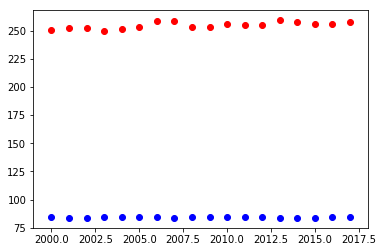

In [175]:
plt.scatter(test["Year"], test["weight"], color = "red")
plt.scatter(test2["Year"], test2["height (inches)"], color = "blue")

In [ ]:
# While height has remained relatively constant, weight has increased. 

In [180]:
#test to see weight increase significance
stats.ttest_ind(test2.height(inches), test.weight, equal_var=False)
#stats.ttest_ind(center_2.PER, center_1.PER, equal_var=False)

AttributeError: 'DataFrame' object has no attribute 'height'